# 1 Business Understanding

### Specifying the Data Analytic Question

**Problem Statement:** In the wake of the global H1N1 influenza pandemic in 2009, the National 2009 H1N1 Flu Survey was conducted to understand the public's perception and behavior towards receiving the H1N1 and seasonal flu vaccines. The goal of this project is to use demographic, social, economic, and health-related data to develop a classification model that can predict the likelihood of individuals receiving these vaccines. This model will have significant implications for researchers, government agencies, and patients, as it can help guide public health initiatives and ensure that vulnerable populations receive the necessary immunizations. The end goal is to provide accurate predictions of H1N1 vaccine uptake and contribute to the reduction of the spread of infectious diseases through the principle of herd immunity.

**Main Objective:** The aim of this project is to utilize demographic, social, economic, and health-related data to develop a classification model that can accurately predict the likelihood of individuals receiving H1N1 and seasonal flu vaccines

# 2. Data Understanding 

The data set consists of information from respondents who participated in the National 2009 H1N1 Flu Survey, with 36 columns and one target variable each for h1n1_vaccine and seasonal_vaccine. The target variables are binary (0 = No; 1 = Yes). The remaining 35 columns provide information about the respondent's social, economic, and demographic background, opinions on risks and vaccine effectiveness, and behaviors towards mitigating the flu transmission.  The performance metric used in this competition is likely to be accuracy, AUC or F1 score. The submission format is likely to be a CSV file with two columns for h1n1_vaccine and seasonal_vaccine probabilities.

This is a binary classification problem where the goal is to predict the likelihood of individuals receiving the H1N1 and seasonal flu vaccines (0 = No; 1 = Yes). There are 35 features available to make this prediction, including demographics, health information, and personal behavior related to flu and vaccination.

# 3. Data Preparation

## 3.1 loading and exploring the dataset

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_curve, auc, r2_score, mean_squared_error

### 3.1.1 Training_set_features

In [2]:
# loading the dataset
training_set = pd.read_csv('training_set_features.csv') 

In [3]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_set dataframe are:")
training_set.head()

The first 5 rows of the training_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_set dataframe are:")
training_set.head()

The first 5 rows of the training_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
# Check the data types of the columns in the dataframe
print("The data types of the columns in the training_set dataframe are:")
training_set.dtypes

The data types of the columns in the training_set dataframe are:


respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [6]:
# Check the shape of the dataframe
print("The shape of the training_set dataframe is:", training_set.shape)

The shape of the training_set dataframe is: (26707, 36)


In [7]:
# Check if there are any missing values in the dataframe
print("The number of missing values in each column of the training_set dataframe is:")
training_set.isna().sum()

The number of missing values in each column of the training_set dataframe is:


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [8]:
# Check the summary statistics of the numerical columns in the dataframe
print("The summary statistics of the numerical columns in the training_set dataframe are:")
training_set.describe()

The summary statistics of the numerical columns in the training_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


### 3.1.2 Cleaning training set labels

In [9]:
#Addressing the Binary Columns
binary_columns_1 = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'household_adults', 'household_children']
binary_columns_2 = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

#Replacing missing values in binary_columns_1 with 0
training_set[binary_columns_1] = training_set[binary_columns_1].fillna(0)

#Replacing missing values in binary_columns_2 with 1
training_set[binary_columns_2] = training_set[binary_columns_2].fillna(1)

In [10]:
#Handling Missing Data 
missing_strings = ['income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'education',
'employment_industry', 'employment_occupation']

training_set[missing_strings] = training_set[missing_strings].fillna("Not Available")

In [11]:
#Checking for missing values in the training features data
missing_values = training_set.isnull().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0


In [12]:
#Check for Duplicate Rows
has_duplicates = training_set.duplicated().any()
has_duplicates

False

### 3.2.1 training_set_labels

In [13]:
# loading the dataset
training_label = pd.read_csv('training_set_labels.csv') 

In [14]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_label dataframe are:")
training_label.head()

The first 5 rows of the training_label dataframe are:


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [15]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_label dataframe are:")
training_label.tail()

The first 5 rows of the training_label dataframe are:


,respondent_id,h1n1_vaccine,seasonal_vaccine
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0
26706,26706,0,0


In [16]:
# Check the data types of the columns in the dataframe
print("The data types of the columns in the training_label dataframe are:")
training_label.dtypes

The data types of the columns in the training_label dataframe are:


respondent_id       int64
h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

In [17]:
# Check the shape of the dataframe
print("The shape of the training_set dataframe is:", training_label.shape)

The shape of the training_set dataframe is: (26707, 3)


In [18]:
# Check if there are any missing values in the dataframe
print("The number of missing values in each column of the training_label dataframe is:")
training_label.isna().sum()

The number of missing values in each column of the training_label dataframe is:


respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [19]:
# Check the summary statistics of the numerical columns in the dataframe
print("The summary statistics of the numerical columns in the training_set dataframe are:")
training_label.describe()

The summary statistics of the numerical columns in the training_set dataframe are:


,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [20]:
#checking for duplicated values
training_label.duplicated().sum()

0

### 3.3.1 test_set_features

In [21]:
#Importing and parsing the training_set_labels dataset
test_set = pd.read_csv('test_set_features.csv')

In [22]:
#Displaying the first 5 rows of the dataframe
print("The first 5 rows of the test_set dataframe are:")
test_set.head()

The first 5 rows of the test_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [23]:
#Displaying the last 5 rows of the dataframe
print("The last 5 rows of the test_set dataframe are:")
test_set.tail()

The last 5 rows of the test_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26707,53414,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,xtkaffoo


In [24]:
#Displaying the data types of the columns in the dataframe
print("The data types of the columns in the test_set dataframe are:")
print(test_set.dtypes)

The data types of the columns in the test_set dataframe are:
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
rac

In [25]:
#Displaying the shape of the dataframe
print("The shape of the test_set dataframe is:", test_set.shape)


The shape of the test_set dataframe is: (26708, 36)


In [26]:
#Displaying the number of missing values in each column of the dataframe
print("The number of missing values in each column of the test_set dataframe is:")
print(test_set.isna().sum())

The number of missing values in each column of the test_set dataframe is:
respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
s

In [27]:
#Displaying the summary statistics of the numerical columns in the dataframe
print("The summary statistics of the numerical columns in the test_set dataframe are:")
test_set.describe()

The summary statistics of the numerical columns in the test_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26708.000000,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,...,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26256.000000,26209.000000,26187.000000,26483.000000,26483.000000
mean,40060.500000,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,...,0.111501,0.887914,3.844622,2.326838,2.360612,4.024832,2.708688,2.143392,0.894310,0.543745
std,7710.079831,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,...,0.314758,0.315483,1.007570,1.275636,1.359413,1.083204,1.376045,1.339102,0.754244,0.935057
min,26707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33383.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,40060.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,46737.250000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,53414.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [28]:
#Checking for duplicated values in the dataframe
print("The number of duplicated values in the test_set dataframe is:")
print(test_set.duplicated().sum())

The number of duplicated values in the test_set dataframe is:
0


### 3.3.2 Cleaning test_set_features

In [29]:
#Removing the columns associated with the seasonal flu vaccine in the test dataframe
##rearranged_test_set = test_set.drop(['opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective', 'doctor_recc_seasonal'], axis=1)
#rearranged_test_set.head()

In [30]:
#Handling the Binary Columns
test_set[binary_columns_2] = test_set[binary_columns_2].fillna(1)
test_set[binary_columns_1] = test_set[binary_columns_1].fillna(0)

In [31]:
#Handling missing values in the test set
categorical_features = [
'income_poverty',
'marital_status',
'rent_or_own',
'employment_status',
'hhs_geo_region',
'education',
'employment_industry',
'employment_occupation'
]

test_set[categorical_features] = test_set[categorical_features].fillna('N/A')

In [32]:
#checking for missing values
missing_values = test_set.isna().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0


## 3.3 Joining dataframes

In [33]:
# Joining the labels and features into one dataframe
joined_df = training_set.merge(training_label, on='respondent_id', how='left')

# Previewing the first 5 rows of the merged dataframe
print("The first 5 rows of the merged dataframe:")
joined_df.head()

The first 5 rows of the merged dataframe:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Not Available,Not Available,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Not Available,Not Available,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [34]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the joined_df dataframe are:")
joined_df.tail()

The first 5 rows of the joined_df dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,Not Available,Not Available,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,Not Available,lzgpxyit,"MSA, Not Principle City",0.0,0.0,Not Available,Not Available,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,Not Available,Not Available,0,0


In [35]:
# Printing the shape of the merged dataframe
print("The shape of the merged dataframe:", joined_df.shape)


The shape of the merged dataframe: (26707, 38)


In [36]:
# Check the data types of the columns in the dataframe
print("The data types of the columns in the joined_df dataframe are:")
joined_df.dtypes

The data types of the columns in the joined_df dataframe are:


respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [37]:
# Checking for missing values
missing = joined_df.isnull().sum()
print("The number of missing values in each column:\n", missing)

The number of missing values in each column:
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                   

In [38]:
# Describing the statistical information of the numerical columns
print("Statistical information of the numerical columns:")
joined_df.describe()

Statistical information of the numerical columns:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.612910,1.257049,0.048714,0.719961,0.068933,0.824316,0.357472,0.336279,0.674018,...,3.808889,2.323061,2.337589,3.973640,2.686075,2.095630,0.878234,0.529599,0.212454,0.465608
std,7709.791156,0.913676,0.622368,0.215273,0.449026,0.253345,0.380558,0.479264,0.472444,0.468749,...,1.057023,1.286238,1.362543,1.147111,1.391849,1.328782,0.754725,0.925264,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [39]:
# Checking the number of duplicate rows
duplicates = joined_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


## 4 Exploratory Data analysis

In [40]:
joined_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Not Available,Not Available,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Not Available,Not Available,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [41]:
# Checking the various statistical measures in the data frame

np.transpose(joined_df.describe())


,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26707.0,1.612910,0.913676,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26707.0,1.257049,0.622368,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26707.0,0.048714,0.215273,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26707.0,0.719961,0.449026,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26707.0,0.068933,0.253345,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26707.0,0.824316,0.380558,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26707.0,0.357472,0.479264,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26707.0,0.336279,0.472444,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26707.0,0.674018,0.468749,0.0,0.0,1.0,1.0,1.0


# 4.1 Univariate Analysis

## 4.1.1 Checking the distribution h1n1_vaccine and also seasonal_vaccine

Checking the  distribution  of the target variable which is h1n1_vaccine and also seasonal_vaccine

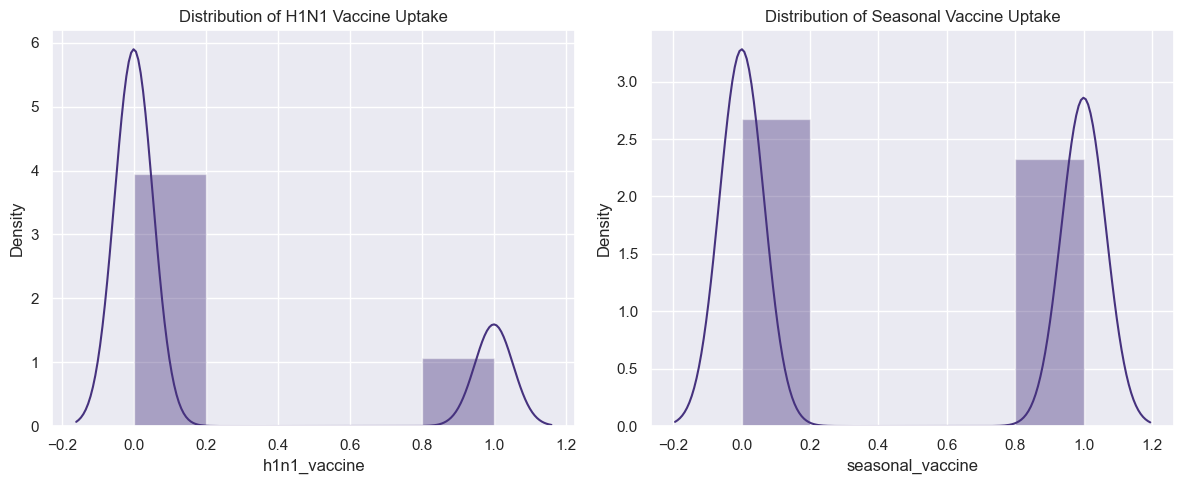

The h1n1_vaccine variable has a skewness of 1.4059428379897505.
The h1n1_vaccine variable has a kurtosis of -0.02332473630532572.
The seasonal_vaccine variable has a skewness of 0.13789351524906218.
The seasonal_vaccine variable has a kurtosis of -1.9809853784522566.


In [42]:
sns.set(rc={'figure.figsize': (18, 10)})
sns.set_palette("viridis")

# Plotting the distribution of both h1n1_vaccine and seasonal_vaccine side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
univariate_plot = sns.distplot(joined_df['h1n1_vaccine'], bins=5, ax=ax[0])
univariate_plot.set_title("Distribution of H1N1 Vaccine Uptake")
univariate_plot2 = sns.distplot(joined_df['seasonal_vaccine'], bins=5, ax=ax[1])
univariate_plot2.set_title("Distribution of Seasonal Vaccine Uptake")
fig.tight_layout()
plt.show()
#fig.savefig('vaccine_uptake_distribution.png')

# Checking for skewness and kurtosis of both variables
print(f"The h1n1_vaccine variable has a skewness of {skew(joined_df['h1n1_vaccine'])}.")
print(f"The h1n1_vaccine variable has a kurtosis of {kurtosis(joined_df['h1n1_vaccine'])}.")
print(f"The seasonal_vaccine variable has a skewness of {skew(joined_df['seasonal_vaccine'])}.")
print(f"The seasonal_vaccine variable has a kurtosis of {kurtosis(joined_df['seasonal_vaccine'])}.")


## 4.1.2 Checking the distribution of Age groups

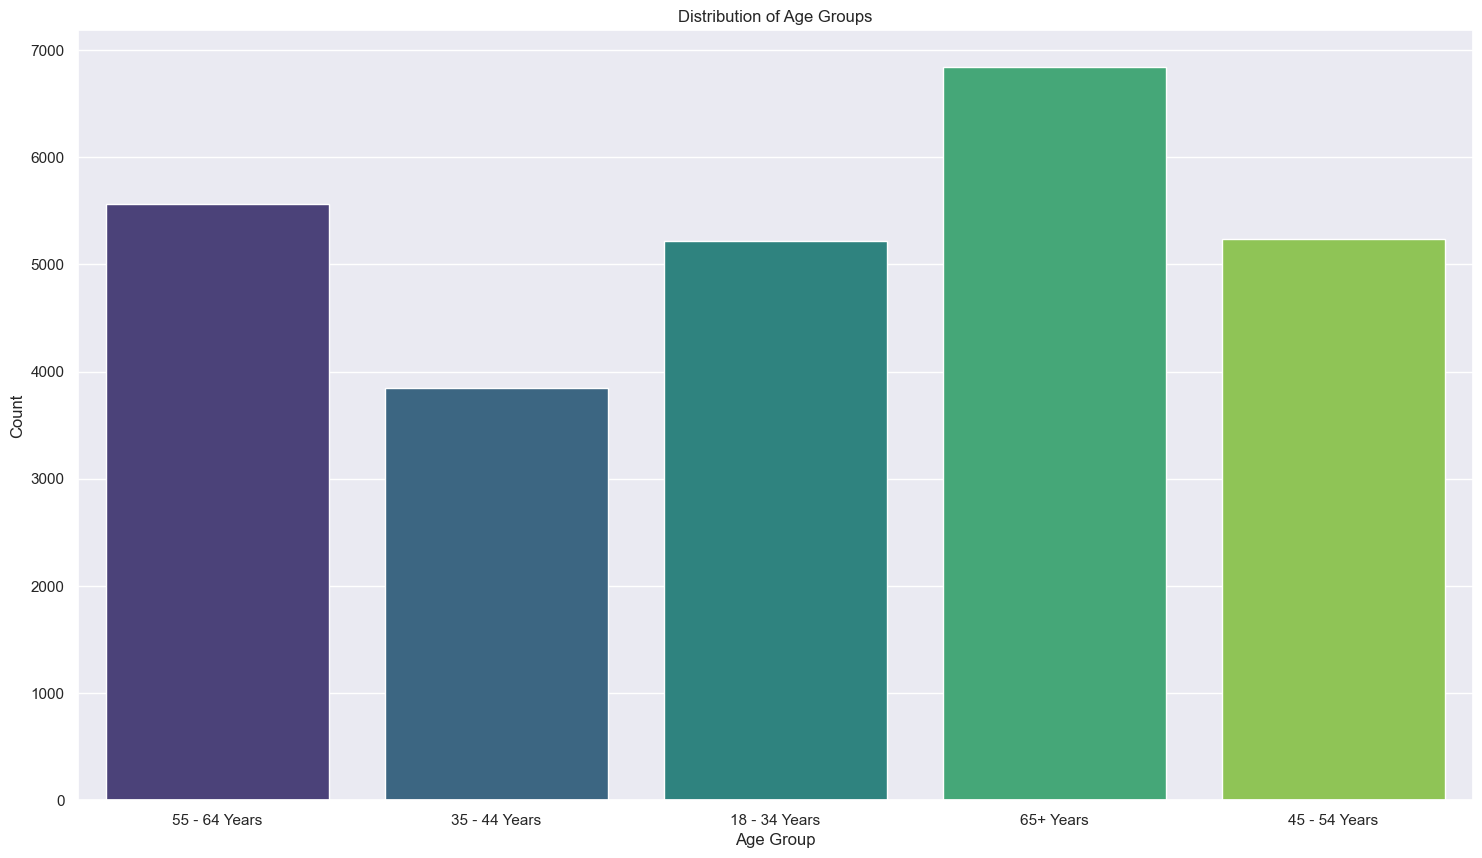

In [43]:
sns.countplot(x='age_group', data=joined_df, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# 4.2 Bivariate Analysis

## 4.2.1 Histograms to visualize the distribution of each column

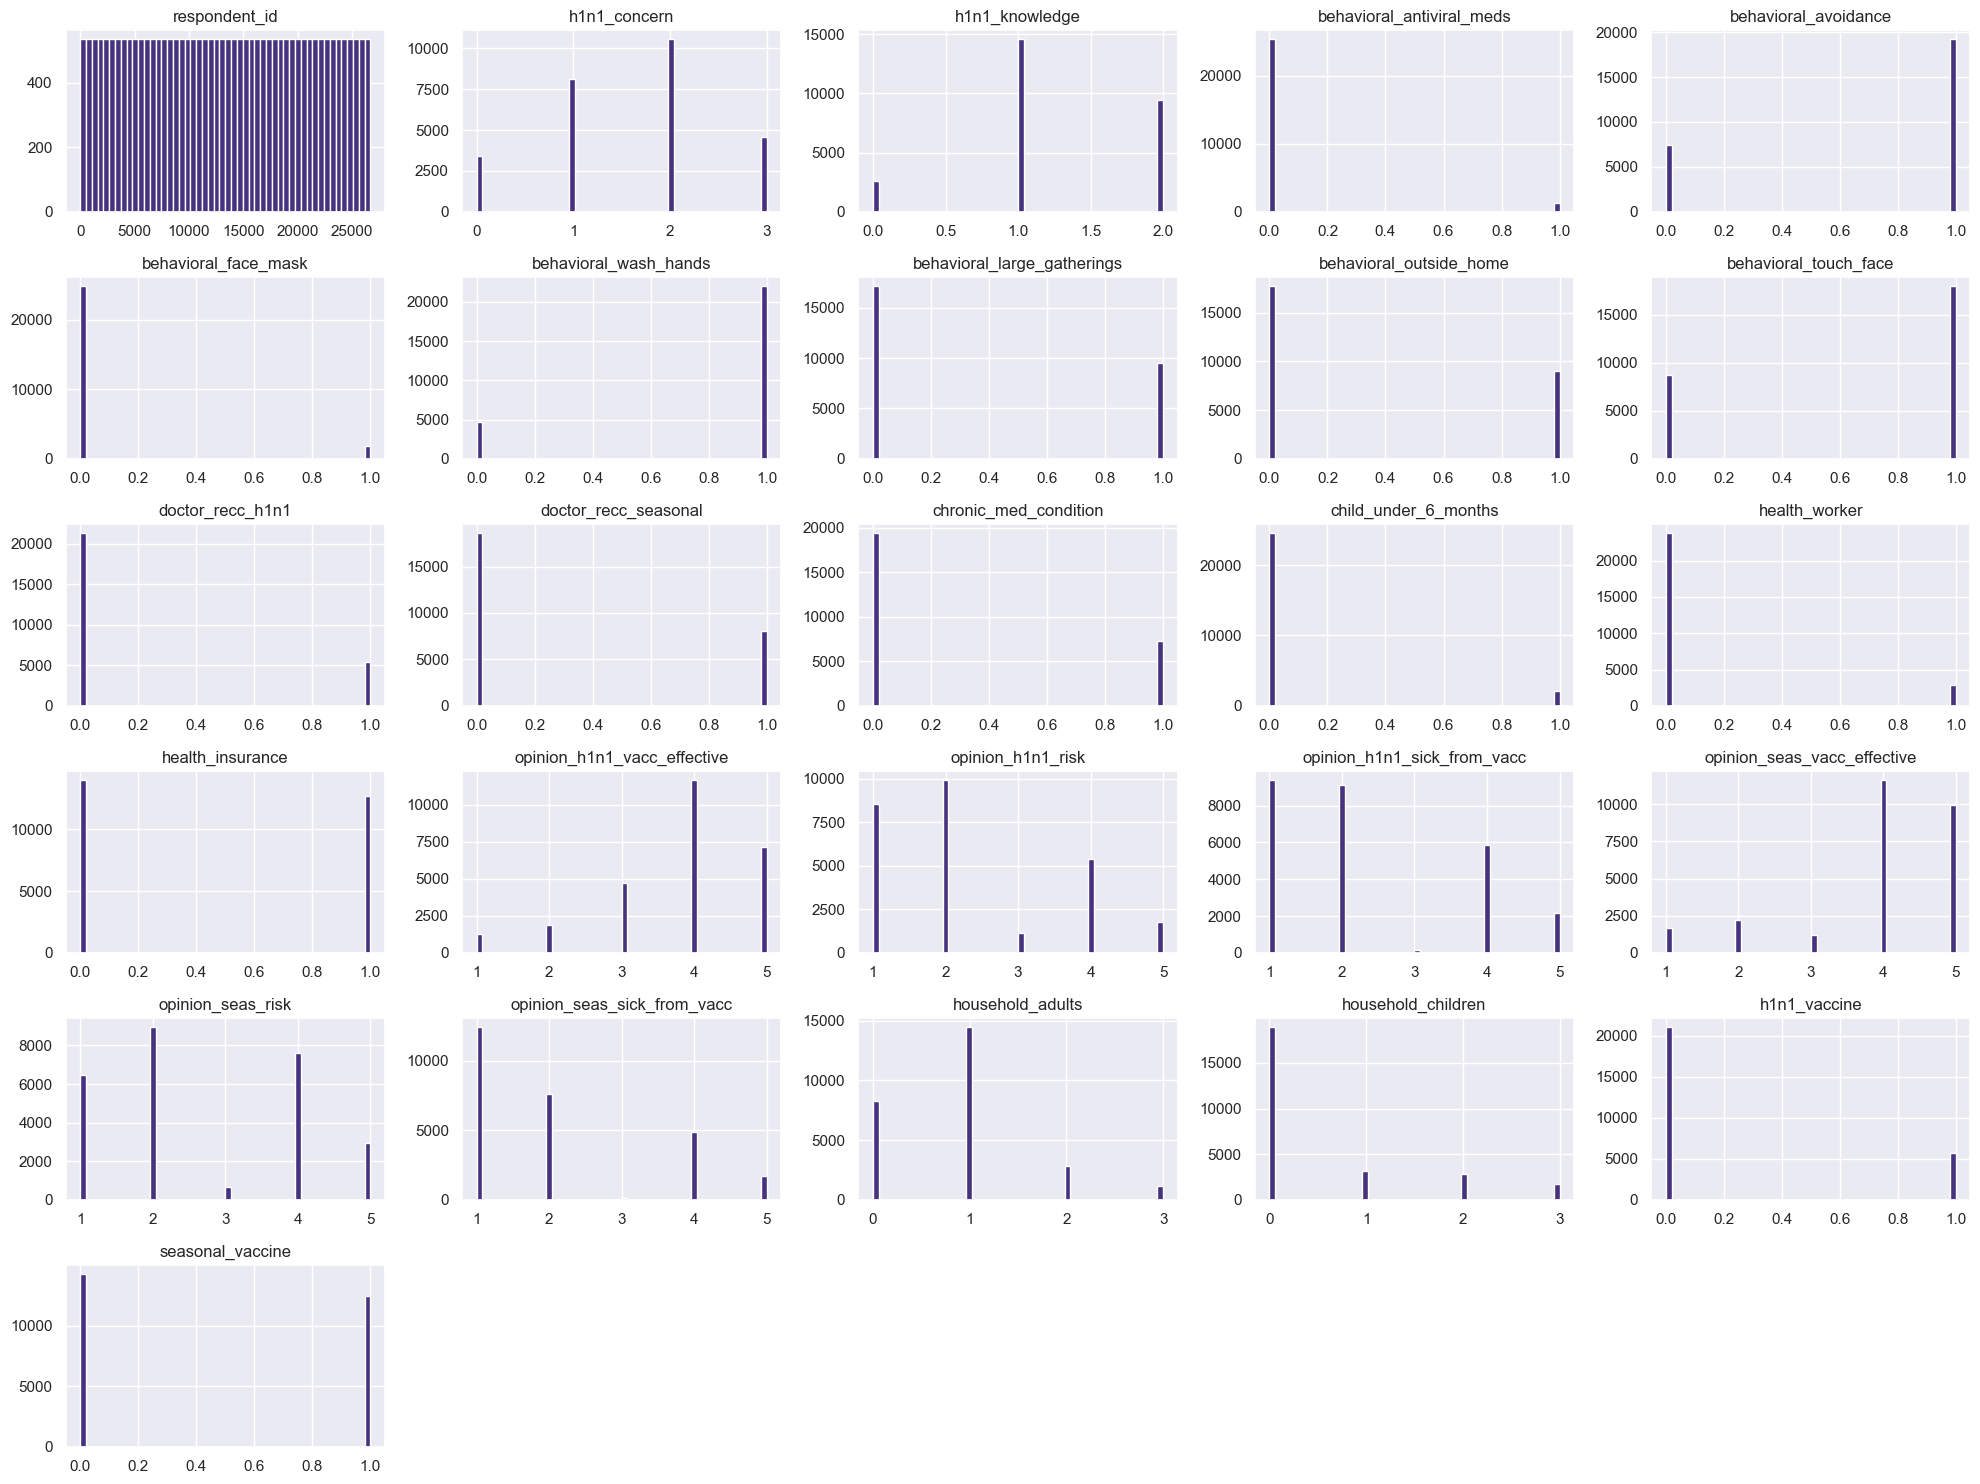

In [44]:
# Plot histograms to visualize the distribution of each column
joined_df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

## 4.2.1 Plotting a correlation heatmap

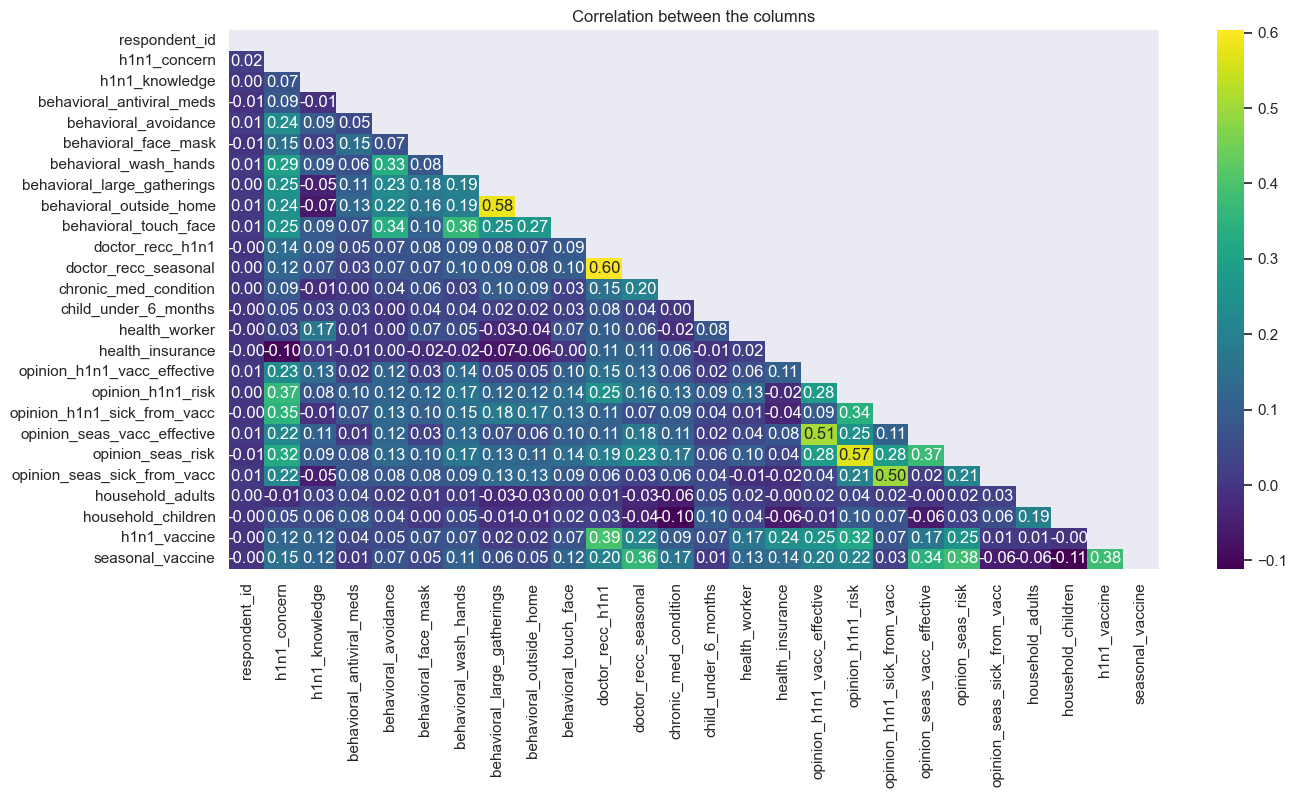

In [45]:
#correlation heatmap 
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(joined_df.corr(), dtype=bool))
sns.heatmap(joined_df.corr(),annot=True,cmap="viridis",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

## 4.2.1 Does age_group  affect the intake of H1N1 vaccine  and seasonal_vaccine?

NameError: name 'total' is not defined

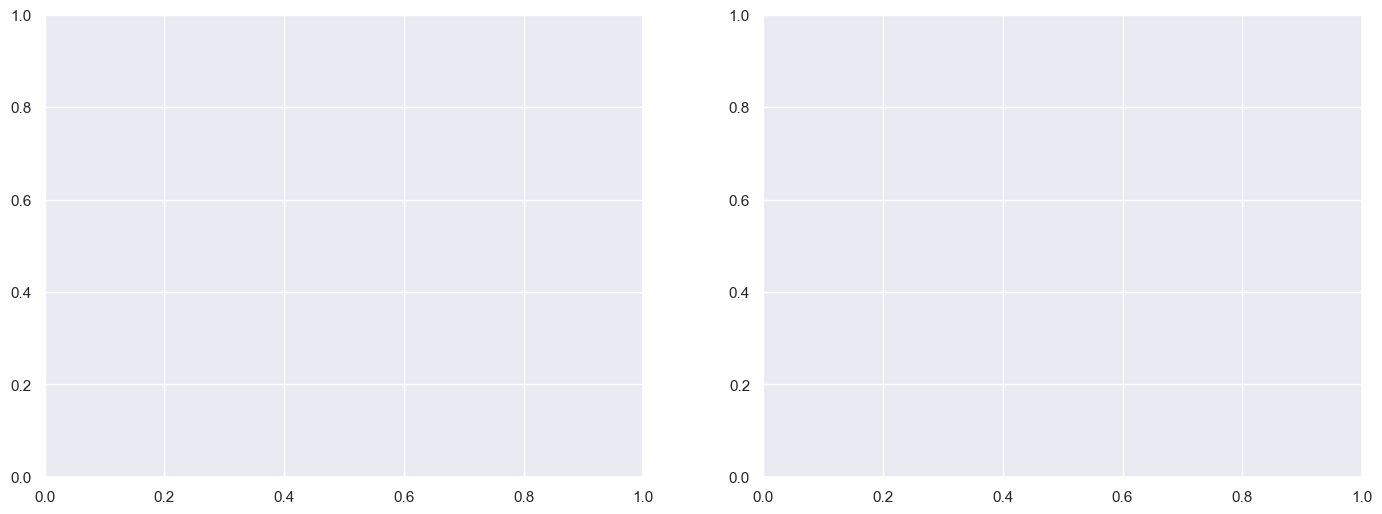

In [46]:
 order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

#Calculating the total number of respondents and proportions of individuals who took the H1N1 vaccine
h1n1_vaccine_counts = joined_df['h1n1_vaccine'].value_counts()
h1n1_vaccine_proportions = h1n1_vaccine_counts / total * 100
h1n1_vaccine_proportions = h1n1_vaccine_proportions.round(2)

#Plotting age group vs H1N1 vaccine uptake
sns.countplot(x='age_group', hue='h1n1_vaccine', data=joined_df, palette='viridis', order=order, ax=ax[1])
ax[1].set_title("Age Group and H1N1 Vaccine Relationship")
ax[1].set_xlabel("Age Group")
ax[1].set_ylabel("Count")
ax[1].legend(title='Vaccine Taken', labels=[f'No ({h1n1_vaccine_proportions[0]}%)', f'Yes ({h1n1_vaccine_proportions[1]}%)'])

#Calculating the total number of respondents and proportions of individuals who took the seasonal vaccine
total = len(joined_df)
seasonal_vaccine_counts = joined_df['seasonal_vaccine'].value_counts()
seasonal_vaccine_proportions = seasonal_vaccine_counts / total * 100
seasonal_vaccine_proportions = seasonal_vaccine_proportions.round(2)

#Plotting age group vs seasonal vaccine uptake
sns.countplot(x='age_group', hue='seasonal_vaccine', data=joined_df, palette='viridis', order=order, ax=ax[0])
ax[0].set_title("Age Group and Seasonal Vaccine Relationship")
ax[0].set_xlabel("Age Group")
ax[0].set_ylabel("Count")
ax[0].legend(title='Vaccine Taken', labels=[f'No ({seasonal_vaccine_proportions[0]}%)', f'Yes ({seasonal_vaccine_proportions[1]}%)'])



plt.show()

## 4.2.2 Does education  affect the in_take of H1N1 vaccine ?

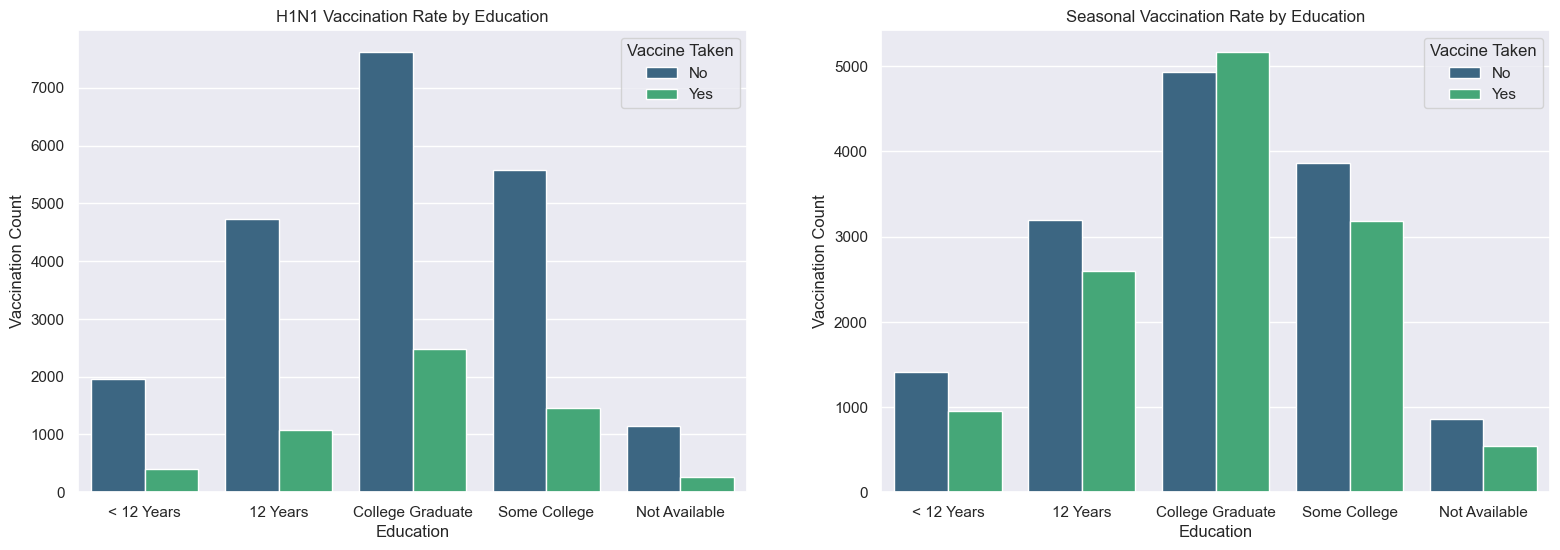

In [47]:
#Bar plot of H1N1 and seasonal vaccination rate by education
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

#Plotting H1N1 vaccination rate by education
sns.countplot(x='education', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Education')
ax[0].set_ylabel('Vaccination Count')
ax[0].set_title('H1N1 Vaccination Rate by Education')
ax[0].legend(title='Vaccine Taken', labels=['No', 'Yes'])

#Plotting seasonal vaccination rate by education
sns.countplot(x='education', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Education')
ax[1].set_ylabel('Vaccination Count')
ax[1].set_title('Seasonal Vaccination Rate by Education')
ax[1].legend(title='Vaccine Taken', labels=['No', 'Yes'])

plt.show()

## 4.2.3 Does Insurance  affect the intake of H1N1 vaccine ?

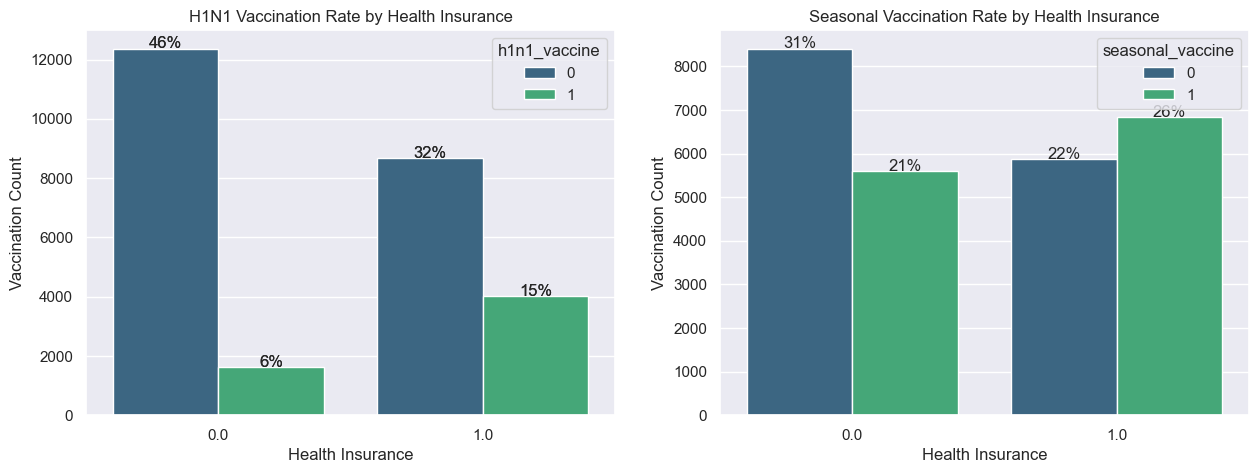

In [48]:
#Bar plot of vaccination rate by insurance with proportions
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='health_insurance', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Health Insurance')
ax[0].set_ylabel('Vaccination Count')
ax[0].set_title('H1N1 Vaccination Rate by Health Insurance')
for i in range(2):
    for j in ax[i].patches:
        height = j.get_height()
        ax[i].text(j.get_x()+j.get_width()/2,
                   height + 10,'{:1.0f}%'.format(height/len(joined_df)*100),ha="center", fontsize=12)

sns.countplot(x='health_insurance', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Health Insurance')
ax[1].set_ylabel('Vaccination Count')
ax[1].set_title('Seasonal Vaccination Rate by Health Insurance')
for i in range(2):
    for j in ax[i].patches:
        height = j.get_height()
        ax[i].text(j.get_x()+j.get_width()/2,
                   height + 10,
                   '{:1.0f}%'.format(height/len(joined_df)*100),ha="center", fontsize=12)

plt.show()

## 4.2.4 Does a region  affect the intake of H1N1 vaccine and seasonal_vaccine ?

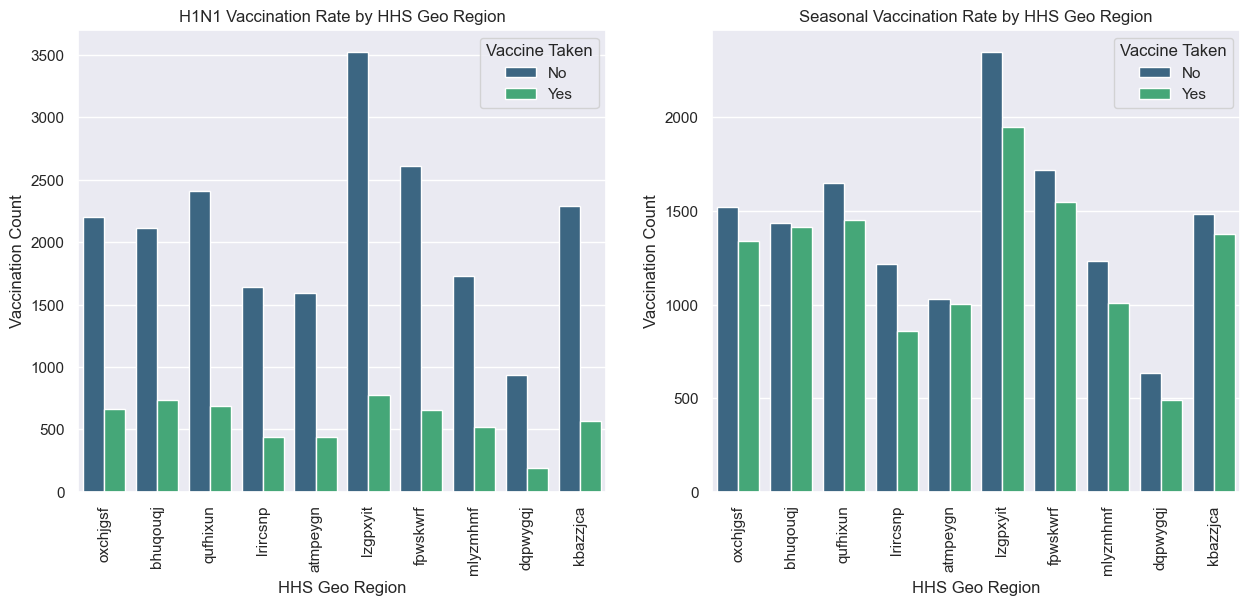

In [49]:
#Bar plot of vaccination rate by hhs_geo_region
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#Plotting hhs_geo_region vs H1N1 vaccine uptake
sns.countplot(x='hhs_geo_region', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('HHS Geo Region')
ax[0].set_ylabel('Vaccination Count')
ax[0].set_title('H1N1 Vaccination Rate by HHS Geo Region')
ax[0].legend(title='Vaccine Taken', labels=['No', 'Yes'])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

#Plotting hhs_geo_region vs seasonal vaccine uptake
sns.countplot(x='hhs_geo_region', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('HHS Geo Region')
ax[1].set_ylabel('Vaccination Count')
ax[1].set_title('Seasonal Vaccination Rate by HHS Geo Region')
ax[1].legend(title='Vaccine Taken', labels=['No', 'Yes'])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

# 4.2.5 Does  Race  affect the intake of H1N1 vaccine  and seasonal_vaccine ?

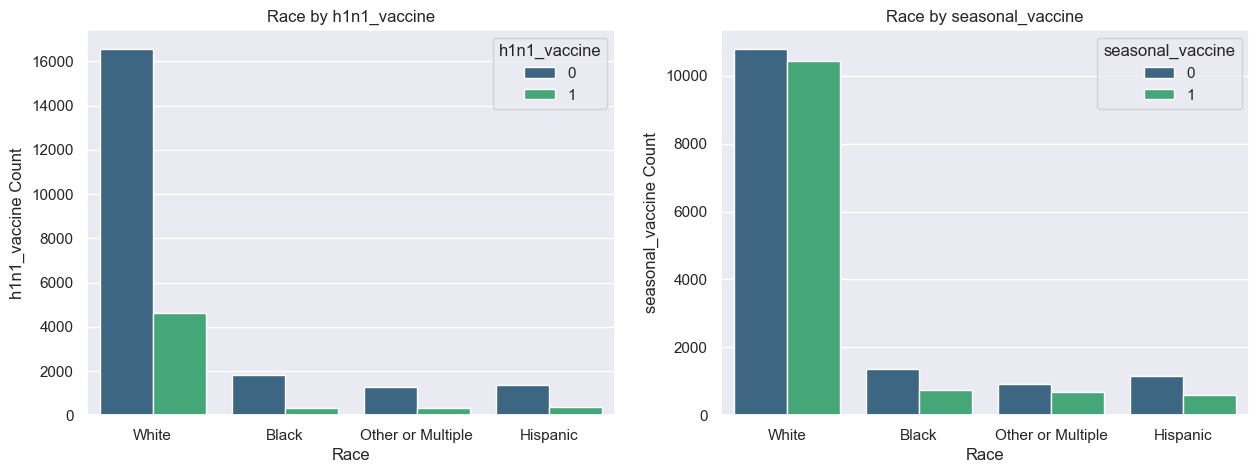

In [50]:
#Plotting distribution of race and h1n1/seasonal_vaccine
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#Plotting count of h1n1_vaccine for each race
sns.countplot(x='race', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Race')
ax[0].set_ylabel('h1n1_vaccine Count')
ax[0].set_title('Race by h1n1_vaccine')

#Plotting count of seasonal_vaccine for each race
sns.countplot(x='race', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Race')
ax[1].set_ylabel('seasonal_vaccine Count')
ax[1].set_title('Race by seasonal_vaccine')

plt.show()

# 4.2.5 Does  employment_status  affect the intake of H1N1 vaccine ?

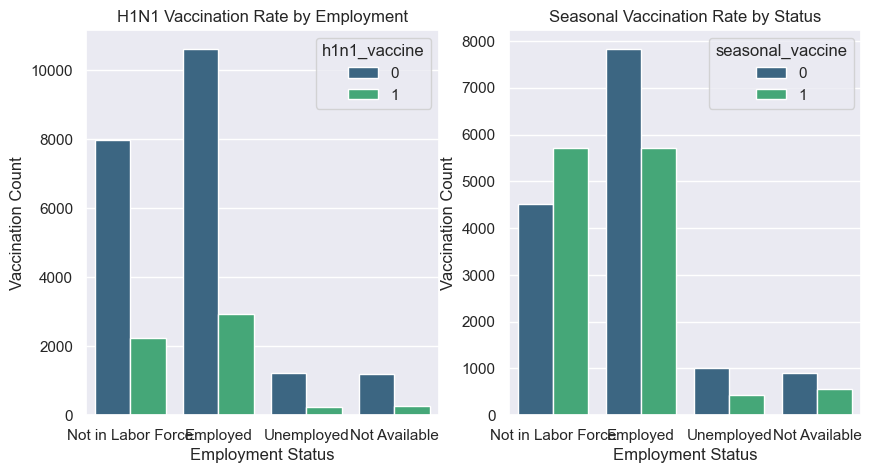

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plotting distribution of employment_status and h1n1_vaccine
sns.countplot(x='employment_status', hue='h1n1_vaccine', data=joined_df, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Employment Status')
ax[0].set_ylabel('Vaccination Count')
ax[0].set_title('H1N1 Vaccination Rate by Employment')

# Plotting distribution of employment_status and seasonal_vaccine
sns.countplot(x='employment_status', hue='seasonal_vaccine', data=joined_df, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Employment Status')
ax[1].set_ylabel('Vaccination Count')
ax[1].set_title('Seasonal Vaccination Rate by Status')

plt.show()


# 4.2.6 How does opinion on H1N1 vaccine Effectiveness vary by Age group?

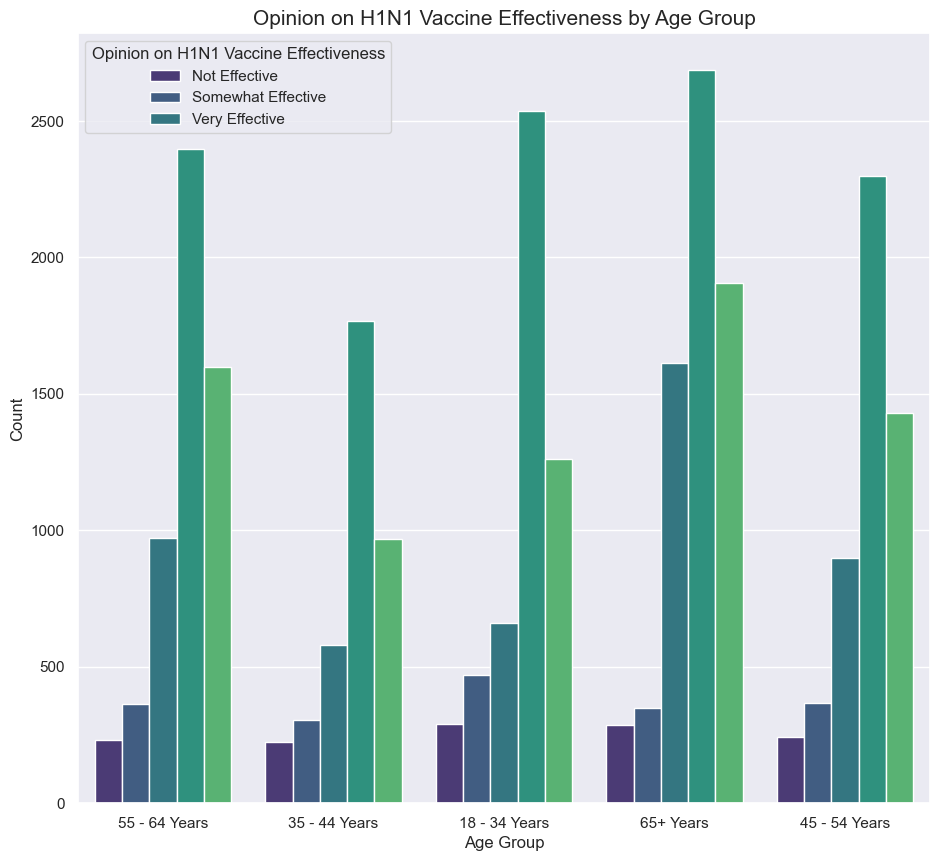

In [52]:
plt.figure(figsize=(11,10))
sns.countplot(x='age_group', hue='opinion_h1n1_vacc_effective', data=joined_df)
plt.title("Opinion on H1N1 Vaccine Effectiveness by Age Group", fontsize=15)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title='Opinion on H1N1 Vaccine Effectiveness', labels=['Not Effective', 'Somewhat Effective', 'Very Effective'])
plt.show()

# 5. Modelling

## Splitting of the data

In [53]:
# Import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split

# Split the training set and training labels into training and testing data
# Use 42 as the random state for reproducibility
# Reserve 25% of the data for testing and use the rest for training
X_train, X_test, y_train, y_test = train_test_split(training_set, training_label, random_state=42, test_size=0.25)


In [54]:
#checking the data types of the training features dataset
training_set.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [55]:
#Select all columns in the dataframe which contain numeric values
num_col = training_set.columns[training_set.dtypes != "object"].values

#Print the list of numeric columns
print(num_col)

['respondent_id' 'h1n1_concern' 'h1n1_knowledge'
 'behavioral_antiviral_meds' 'behavioral_avoidance' 'behavioral_face_mask'
 'behavioral_wash_hands' 'behavioral_large_gatherings'
 'behavioral_outside_home' 'behavioral_touch_face' 'doctor_recc_h1n1'
 'doctor_recc_seasonal' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'health_insurance' 'opinion_h1n1_vacc_effective'
 'opinion_h1n1_risk' 'opinion_h1n1_sick_from_vacc'
 'opinion_seas_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_sick_from_vacc' 'household_adults' 'household_children']


In [56]:
#Get the non-numeric features in the dataset
non_numeric_col = training_set.columns[training_set.dtypes == 'object'].values

#Print the non-numeric features
print(non_numeric_col)

['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


In [57]:
#Importing the StandardScaler module from the sklearn library
from sklearn.preprocessing import StandardScaler

#Storing the non-numeric columns in a variable
non_numeric_cols = X_train[non_numeric_col]

#Storing the numeric columns in a variable
num_cols = X_train[num_col]

#Scaling the numeric columns using StandardScaler
num_cols = StandardScaler().fit_transform(num_cols)
pd.DataFrame(num_cols)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.530287,-0.672533,-0.417805,-0.226446,-1.597710,-0.274025,-2.148706,-0.744662,-0.71286,-1.428256,...,-0.352341,-0.951166,0.183464,-0.253036,-0.252041,0.019995,-0.494827,-0.073428,0.162628,0.505972
1,0.082208,0.423281,-0.417805,-0.226446,0.625896,-0.274025,0.465396,-0.744662,-0.71286,-1.428256,...,-0.352341,1.051341,-0.760241,-0.253036,-0.984967,0.019995,1.659978,1.430418,1.492737,0.505972
2,-0.269975,-1.768348,-2.026850,-0.226446,-1.597710,-0.274025,-2.148706,-0.744662,-0.71286,-1.428256,...,-0.352341,1.051341,0.183464,-1.029194,-0.984967,0.019995,-0.494827,-0.825351,-1.167481,0.505972
3,-1.355257,-0.672533,-0.417805,-0.226446,-1.597710,-0.274025,-2.148706,-0.744662,-0.71286,-1.428256,...,-0.352341,1.051341,0.183464,-1.029194,-0.984967,0.019995,0.941710,-0.073428,-1.167481,-0.573097
4,0.739331,0.423281,-0.417805,4.416054,0.625896,-0.274025,0.465396,1.342892,1.40280,0.700155,...,-0.352341,-0.951166,1.127169,-1.029194,-0.252041,-2.603406,-0.494827,1.430418,-1.167481,-0.573097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,1.061874,0.423281,-0.417805,-0.226446,-1.597710,-0.274025,0.465396,-0.744662,-0.71286,0.700155,...,-0.352341,1.051341,0.183464,-0.253036,-0.252041,0.019995,-0.494827,-0.825351,-1.167481,-0.573097
20026,-1.032973,-0.672533,-0.417805,-0.226446,-1.597710,-0.274025,0.465396,-0.744662,-0.71286,0.700155,...,-0.352341,-0.951166,0.183464,-0.253036,-0.984967,0.019995,-0.494827,1.430418,-1.167481,-0.573097
20027,-1.619297,0.423281,-0.417805,-0.226446,0.625896,-0.274025,-2.148706,-0.744662,-0.71286,0.700155,...,-0.352341,-0.951166,0.183464,-0.253036,-0.252041,0.019995,-0.494827,-0.073428,0.162628,-0.573097
20028,0.313761,0.423281,-0.417805,-0.226446,0.625896,-0.274025,0.465396,-0.744662,-0.71286,0.700155,...,2.838160,1.051341,-2.647651,-1.029194,1.213810,-2.603406,-1.213095,1.430418,0.162628,-0.573097


In [58]:
#Encoding the non-numeric data
from sklearn.preprocessing import OrdinalEncoder

#Initialize the ordinal encoder
encoder = OrdinalEncoder()

#Fit the encoder on the non-numeric columns in the training data
non_numeric_cols = X_train[non_numeric_col]
non_numeric_cols = encoder.fit_transform(non_numeric_cols)

#Display the encoded columns
pd.DataFrame(non_numeric_cols)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,3.0,0.0,3.0,2.0,1.0,2.0,8.0,2.0,0.0,0.0
1,2.0,4.0,3.0,0.0,3.0,0.0,0.0,0.0,6.0,0.0,5.0,12.0
2,2.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,4.0,1.0,18.0,8.0
3,3.0,2.0,3.0,1.0,2.0,2.0,1.0,0.0,7.0,0.0,8.0,17.0
4,0.0,3.0,3.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20025,3.0,4.0,3.0,1.0,1.0,2.0,1.0,2.0,9.0,1.0,0.0,0.0
20026,3.0,4.0,3.0,1.0,0.0,2.0,1.0,3.0,7.0,1.0,0.0,0.0
20027,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0,2.0,21.0
20028,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,5.0,3.0


In [59]:
#Re-assigning the non-numeric and scaled numeric columns to X_train
X_train[non_numeric_col] = non_numeric_cols
X_train[num_col] = num_cols

#Printing the first 5 rows of X_train after scaling the numeric columns
X_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
25194,1.530287,-0.672533,-0.417805,-0.226446,-1.597710,-0.274025,-2.148706,-0.744662,-0.71286,-1.428256,...,3.0,2.0,1.0,2.0,8.0,2.0,0.162628,0.505972,0.0,0.0
14006,0.082208,0.423281,-0.417805,-0.226446,0.625896,-0.274025,0.465396,-0.744662,-0.71286,-1.428256,...,3.0,0.0,0.0,0.0,6.0,0.0,1.492737,0.505972,5.0,12.0
11285,-0.269975,-1.768348,-2.026850,-0.226446,-1.597710,-0.274025,-2.148706,-0.744662,-0.71286,-1.428256,...,0.0,2.0,1.0,0.0,4.0,1.0,-1.167481,0.505972,18.0,8.0
2900,-1.355257,-0.672533,-0.417805,-0.226446,-1.597710,-0.274025,-2.148706,-0.744662,-0.71286,-1.428256,...,2.0,2.0,1.0,0.0,7.0,0.0,-1.167481,-0.573097,8.0,17.0
19083,0.739331,0.423281,-0.417805,4.416054,0.625896,-0.274025,0.465396,1.342892,1.40280,0.700155,...,3.0,1.0,0.0,1.0,1.0,0.0,-1.167481,-0.573097,0.0,0.0


In [60]:
#Transform the numeric columns in the test set
scaled_numeric_cols_test = encoder.fit_transform(X_test[num_col])

#Print the transformed numeric columns in the test set
print(scaled_numeric_cols_test)

[[3.951e+03 2.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.364e+03 3.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [4.156e+03 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 ...
 [9.640e+02 1.000e+00 2.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.487e+03 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [4.122e+03 2.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]


In [61]:
scaled_non_numeric_cols_test = encoder.fit_transform(X_test[non_numeric_col])
scaled_non_numeric_cols_test

array([[ 0.,  3.,  3., ...,  1.,  0.,  0.],
       [ 1.,  3.,  3., ...,  1.,  0.,  0.],
       [ 2.,  2.,  3., ...,  0.,  9., 11.],
       ...,
       [ 3.,  0.,  3., ...,  1., 18., 22.],
       [ 2.,  4.,  2., ...,  0.,  9., 11.],
       [ 1.,  4.,  3., ...,  2., 11., 11.]])

In [62]:
#Updating the X_test dataset with the scaled non-numeric and numeric columns
X_test[non_numeric_col] = scaled_non_numeric_cols_test
X_test[num_col] = scaled_numeric_cols_test

#Verify the updates to the X_test dataset
X_test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
15772,3951.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9407,2364.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3.0,1.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0
16515,4156.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0,11.0
23353,5873.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,3.0,22.0
10008,2507.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,19.0,22.0


# 1. Logistical Regression

In [63]:
y_train_H1N1 = y_train.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [64]:
y_test_H1N1 = y_test.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [65]:
#importing the modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Instantiate a LogisticRegression with random_state=42
bsline_model = LogisticRegression(random_state=42, C=1e12)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
bslineneg_log_loss = cross_val_score(bsline_model, X_train, y_train_H1N1, scoring='neg_log_loss', error_score='raise')

bslinelog_loss = -(bslineneg_log_loss.mean())
bslinelog_loss

0.3668669137574733

In [66]:
#Calculating the accuracy of the model
bsline_model.fit(X_train, y_train_H1N1)
y_pred = bsline_model.predict(X_test)

logistic_accuracy = accuracy_score(y_pred, y_test_H1N1)
logistic_accuracy

0.7864310319005542

In [67]:
#calculating the precision

# Display the precision score

logistic_precession = precision_score(y_test_H1N1, y_pred)
logistic_precession

0.45714285714285713

In [68]:
# Display the recall score

logistic_recall = recall_score(y_test_H1N1, y_pred)
logistic_recall

0.03387438249823571

In [69]:
#modeling with the seasonal vaccine data
y_train_seasvacc = y_train.drop(columns=['respondent_id', 'h1n1_vaccine'])
y_test_seasvacc = y_test.drop(columns=['respondent_id', 'h1n1_vaccine'])

In [70]:
# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
bslineneg_log_loss2 = cross_val_score(bsline_model, X_train, y_train_seasvacc, scoring='neg_log_loss', error_score='raise')

bslinelog_loss2 = -(bslineneg_log_loss2.mean())
bslinelog_loss2

0.48891659942682886

In [71]:
#Calculating the accuracy of the model
bsline_model.fit(X_train, y_train_seasvacc)
y_pred2 = bsline_model.predict(X_test)

logistic_accuracy2 = accuracy_score(y_pred2, y_test_seasvacc)
logistic_accuracy2

0.5532424741650441

In [72]:
#calculating the precision

# Display the precision score
logistic_precession2 = precision_score(y_test_seasvacc, y_pred2)
logistic_precession2

0.6094890510948905

In [73]:
# Display the recall score

logistic_recall2 = recall_score(y_test_seasvacc, y_pred2)
logistic_recall2

0.05488005257969109

In [74]:
logistic_accuracy_final = (logistic_accuracy + logistic_accuracy2)/2
logistic_accuracy_final

0.6698367530327991

In [75]:
logistic_r_2_ = r2_score(y_test_H1N1, y_pred)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
logistic_mse = np.sqrt(mean_squared_error(y_test_H1N1, y_pred))
print(logistic_r_2_, logistic_mse)

-0.2774541083153774 0.46213522707043864


In [76]:
log_r_2 = r2_score(y_test_seasvacc, y_pred2)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
logistic_mse = np.sqrt(mean_squared_error(y_test_seasvacc, y_pred2))
print(log_r_2, logistic_mse)

-0.8011411739023724 0.6683992263871614


# 2. Decision Tree

In [78]:
# importing the function 
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error

# Instantiate DecisionTreeRegressor 
# Set random_state=45
clf_tree = DecisionTreeClassifier(random_state=45)

# Fit the model to training data
clf_tree.fit(X_train, y_train_H1N1)

# Make predictions on the test data
y_tree_pred = clf_tree.predict(X_test)

r_squared  = r2_score(y_test_H1N1, y_tree_pred)
rmse  = np.sqrt(mean_squared_error(y_test_H1N1, y_tree_pred))
print(r_squared , rmse )

-1.071159816567428 0.5884414090608842


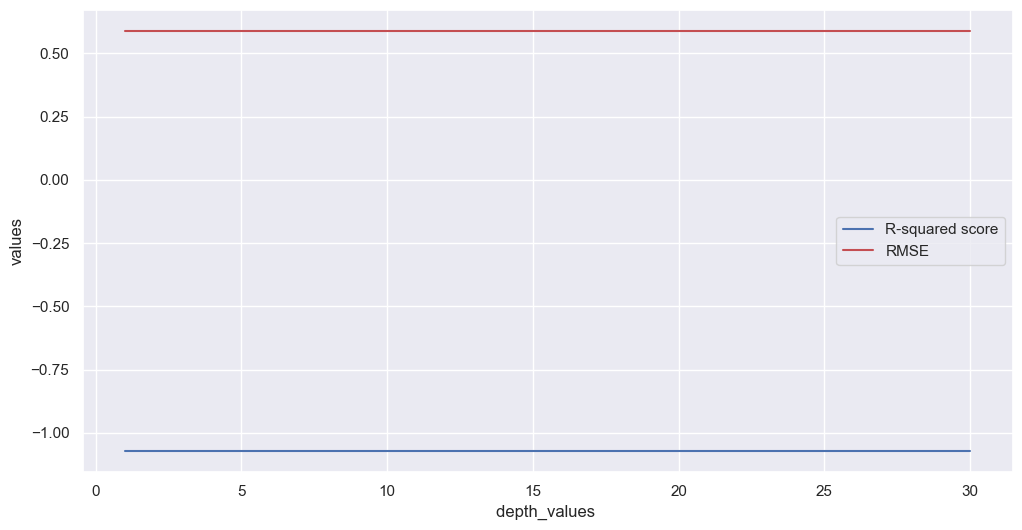

In [79]:
#Find the best tree depth

depth_values  = np.linspace(1, 30, 30)
r2_scores  = []
root_mean_squared_errors  = []

for depth in depth_values :
    clf_tree = DecisionTreeClassifier(random_state=45, max_depth=int(depth))
    clf_tree.fit(X_train, y_train_H1N1)
    y_prediction = clf_tree.predict(X_test)
    r_squared  = r2_score(y_test_H1N1, y_tree_pred)
    rmse  = np.sqrt(mean_squared_error(y_test_H1N1, y_tree_pred))
    r2_scores .append(r_squared )
    root_mean_squared_errors .append(rmse )
    
plt.figure(figsize=(12,6))
plt.plot(depth_values , r2_scores , 'b', label='R-squared score')
plt.plot(depth_values , root_mean_squared_errors , 'r', label='RMSE')
plt.ylabel('values')
plt.xlabel('depth_values ')
plt.legend()
plt.show()

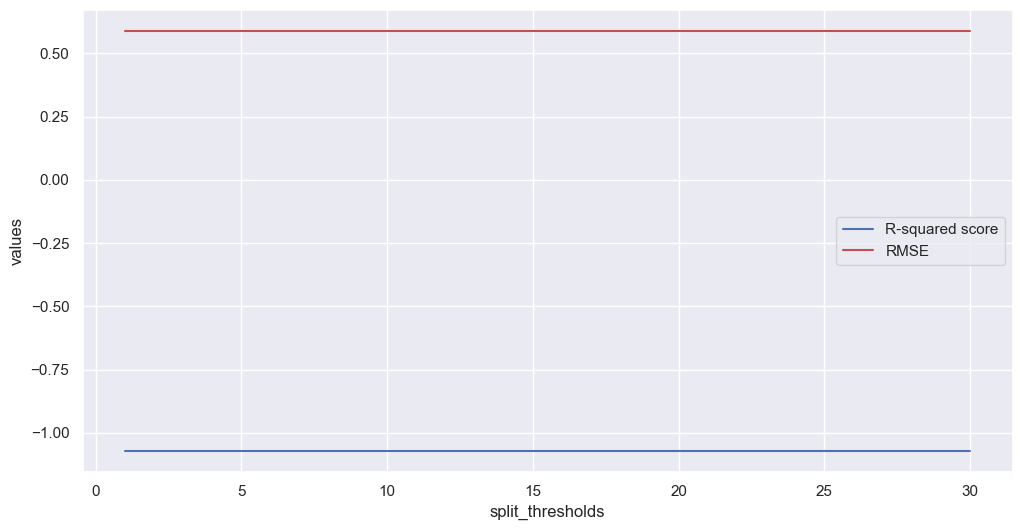

In [80]:
#minimum sample splits
split_thresholds = np.linspace(0.1, 1.0, 30, endpoint=True)
r2_scores  = []
root_mean_squared_errors  = []

for split  in split_thresholds:
    clf_tree = DecisionTreeClassifier(random_state=45, min_samples_split=split)
    clf_tree.fit(X_train, y_train_H1N1)
    y_prediction = clf_tree.predict(X_test)
    r_squared  = r2_score(y_test_H1N1, y_tree_pred)
    rmse  = np.sqrt(mean_squared_error(y_test_H1N1, y_tree_pred))
    r2_scores.append(r_squared )
    root_mean_squared_errors .append(rmse )
    
plt.figure(figsize=(12,6))
plt.plot(depth_values , r2_scores , 'b', label='R-squared score')
plt.plot(depth_values , root_mean_squared_errors , 'r', label='RMSE')
plt.ylabel('values')
plt.xlabel('split_thresholds')
plt.legend()
plt.show()


In [81]:
y_tree_pred = clf_tree.predict(X_test)

# Calculate the r2 score between 'y_true' and 'y_predict'
r2_scores  = r2_score(y_test_H1N1, y_tree_pred)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
root_mean_squared_errors  = np.sqrt(mean_squared_error(y_test_H1N1, y_tree_pred))
# Return the score
print(r2_scores , root_mean_squared_errors )

-0.15920449941100867 0.4402267717933162


In [82]:
#print('Accuracy: ', accuracy_score(y_test_H1N1, y_tree_pred))
tree_accuracy1  = accuracy_score(y_test_H1N1, y_tree_pred)
print(tree_accuracy1)

0.8062003893964356


In [83]:
# Calculate the r2 score between 'y_true' and 'y_predict'
r2_scores  = r2_score(y_test_seasvacc, y_tree_pred)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
root_mean_squared_errors  = np.sqrt(mean_squared_error(y_test_seasvacc, y_tree_pred))
# Return the score
print(r2_scores , root_mean_squared_errors )

-0.5831686751498559 0.6266508824225149


In [84]:
#print('Accuracy: ', accuracy_score(y_test_seasvacc, y_tree_pred))
tree_accuracy2 = accuracy_score(y_test_seasvacc, y_tree_pred)
print(tree_accuracy2)

0.6073086715590834


In [85]:
tree_accuracy = (tree_accuracy1  + tree_accuracy2)/2
tree_accuracy

0.7067545304777595

# Using entropy

In [86]:
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3) #or gini -> squared, entropy -> log

# Train Decision Tree Classifer
clf_tree = clf_tree.fit(X_train,y_train_H1N1)

#Predict the response for test dataset
y_pred_clf = clf_tree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
entropy_accuracy1 = accuracy_score(y_test_H1N1, y_pred_clf)
entropy_accuracy1

0.8295641755279317

In [87]:
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf_tree = clf_tree.fit(X_train,y_train_seasvacc)

#Predict the response for test dataset
y_pred_clf2 = clf_tree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
entropy_accuracy2 = accuracy_score(y_test_seasvacc, y_pred_clf2)
entropy_accuracy2

0.6162947431481204

In [88]:
final_entropy_accuracy = (entropy_accuracy1 + entropy_accuracy2)/2
final_entropy_accuracy

0.722929459338026

In [89]:
tree_r_squared  = r2_score(y_test_H1N1, y_pred_clf)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
tree_mse = np.sqrt(mean_squared_error(y_test_H1N1, y_pred_clf))
print(tree_r_squared , tree_mse)

-0.01945496161493665 0.41283873906413904


In [90]:
tree_r_squared = r2_score(y_test_seasvacc, y_pred_clf2)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
tree_mse_ = np.sqrt(mean_squared_error(y_test_seasvacc, y_pred_clf2))
print(tree_r_squared, tree_mse_)

-0.5469405590137038 0.6194394698853791


In [91]:
tree_precision  = precision_score(y_pred_clf, y_test_H1N1)
tree_precision 

0.32462949894142556

In [92]:
tree_recall  = recall_score(y_pred_clf, y_test_H1N1)
tree_recall 

0.717628705148206

In [93]:
tree_precision_2  = precision_score(y_pred_clf2, y_test_seasvacc)
tree_precision_2 

0.8567203417679922

In [94]:
tree_recall2 = recall_score(y_pred_clf2, y_test_seasvacc)
tree_recall2

0.5508134375660257

# 3 Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

rnd_forest = RandomForestRegressor()

# Number of trees in random forest
num_trees = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]

# Number of features to consider at every split
feat_options  = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depths = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depths.append(None)

# Minimum number of samples required to split a node
min_samples_splits  = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaves   = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
hyperparam_grid  = {'num_trees': num_trees,
                    'feat_options ': feat_options ,
                    'max_depths': max_depths,
                    'min_samples_splits ': min_samples_splits ,
                    'min_samples_leaves  ': min_samples_leaves  ,
                    'bootstrap': bootstrap}
hyperparam_grid

{'num_trees': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50],
 'feat_options ': ['auto', 'sqrt'],
 'max_depths': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_splits ': [2, 5, 10],
 'min_samples_leaves  ': [1, 2, 4],
 'bootstrap': [True, False]}

In [99]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rnd_forest= RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
forest_random = RandomizedSearchCV(estimator = rnd_forest , param_distributions = hyperparam_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
forest_random.fit(X_train, y_train_H1N1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


ValueError: Invalid parameter 'num_trees' for estimator RandomForestRegressor(). Valid parameters are: ['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
 forest_random.best_params_

In [ ]:
# Instantiate and fit a RandomForestClassifier
rnd_forest2  = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, 
                                 min_samples_leaf = 4, max_features = 'sqrt', max_depth = None, bootstrap = False)
rnd_forest2.fit(X_train, y_train_H1N1)
y_train_preds  = rnd_forest2.predict(X_test)

# Training accuracy score
print('Train Accuracy:', rnd_forest2.score(X_train, y_train_H1N1))
print()
print('Test Accuracy', rnd_forest2.score(X_test, y_test_H1N1))

forest_accuracy_score1  = rnd_forest2.score(X_test, y_test_H1N1)
forest_accuracy_score1


In [ ]:
# Instantiate and fit a RandomForestClassifier
rnd_forest2 = RandomForestClassifier(n_estimators = 50, min_samples_split  = 5, 
                                 min_samples_leaf = 4, max_features  = 'sqrt', max_depth = None, bootstrap = False)
rnd_forest2.fit(X_train, y_train_seasvacc)

y_train_preds2  = rnd_forest2.predict(X_test)

# Training accuracy score
print('Train:', rnd_forest2.score(X_train, y_train_seasvacc))
print()
print('test', rnd_forest2.score(X_test, y_test_seasvacc))

forest_accuracy_score2 = rnd_forest2.score(X_test, y_test_seasvacc)
forest_accuracy_score2


In [ ]:
final_forest = (forest_accuracy_score1 + forest_accuracy_score2)/2
final_forest

In [ ]:
# Calculate precision score of the model on test data
forest_precision = precision_score(y_train_preds, y_test_H1N1)
print('Precision:', forest_precision)

In [ ]:
forest_precision2 = precision_score(y_train_preds2, y_test_H1N1)
print(forest_precision2)

In [ ]:
forest_recall = recall_score(y_train_preds, y_test_seasvacc)
print(forest_recall)


In [ ]:
forest_recall2 = recall_score(y_train_preds2, y_test_seasvacc)
print(forest_recall2)

# Models Output

In [ ]:
data = {'Model':["Logistic Regression", "Decision Tree", 'Random Forest'],
        'Accuracy H1N1': [logistic_accuracy, entropy_accuracy1, forest_accuracy_score1],
        'Accuracy Seasonal':[logistic_accuracy2, entropy_accuracy2, forest_accuracy_score2],
        'Final Accuracy':[logistic_accuracy_final,final_entropy_accuracy, final_forest],
        'Precision H1N1':[logistic_precession, tree_precision, forest_precision],
        'precision Seasonal':[logistic_precession2, tree_precision_2, forest_precision2],
        'Recall H1N1':[logistic_recall, tree_recall, forest_recall],
        'Recall seasonal':[logistic_recall2, tree_recall2, forest_recall2]
       }
output = pd.DataFrame(data)
 
output


In [ ]:
model_names = ["LogReg","DT", 'RF']
plt.figure(figsize = (7, 7))
sns.barplot(x = model_names, y = data['Final Accuracy'], palette='viridis')
plt.show()

# Evaluation

# Final model

In [ ]:
training1 = pd.read_csv('training_set_features.csv')
training2 = pd.read_csv('training_set_labels.csv')
test1 = pd.read_csv('test_set_features.csv')

In [ ]:
training_features.shape

In [ ]:
test_features.shape

In [ ]:
numeric_test = test_features.columns[training_features.dtypes != "object"].values
print(numeric_test)

In [ ]:
non_numeric_test = test_features.columns[training_features.dtypes == 'object'].values
print(non_numeric_test)

In [ ]:
test_features[numeric_test] = scaler.fit_transform(test_features[numeric_test])

In [ ]:
#Using Random Forest
final_rf = RandomForestClassifier(num_trees = 50, min_samples_splits  = 5, 
                                 min_samples_leaf = 4, feat_options  = 'sqrt', max_depths = None, bootstrap = False)
final_rf.fit(X_train, y_train_H1N1)

In [ ]:
final_pred_h1n1 = final_rf.predict_proba(test_features)
final_pred_h1n1

In [ ]:
h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": final_pred_h1n1[:, 1],
        #"seasonal_vaccine": final_pred_seas[1][:, 1],
    },
    index = df2.respondent_id
)
print("h1n1.shape:", h1n1.shape)
h1n1.head()

In [ ]:
final_rf.fit(X_train, y_train_seas)
final_pred_seas = final_rf.predict_proba(test_features)

In [ ]:
seas = pd.DataFrame(
    {
        #"seasonal_vaccine": final_pred_h1n1[:, 1],
        "seasonal_vaccine": final_pred_seas[:, 1],
    },
    index = df2.respondent_id
)
print("seas.shape:", seas.shape)
seas.head()

In [ ]:
sub = h1n1.join(seas, on='respondent_id')
sub['h1n1_vaccine'] = sub['h1n1_vaccine']
sub['seasonal_vaccine'] = sub['seasonal_vaccine']

In [ ]:
sub.to_csv('submission_format.csv')